In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score, balanced_accuracy_score,classification_report
#from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
import pickle

pd.set_option('display.max_columns', 500)
sns.set()

sns.set_style('darkgrid')

In [23]:
df = pd.read_csv('Default_Fin.csv')

In [3]:
df.shape

(10000, 5)

In [25]:
df.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


In [4]:
df = df.drop(['Index'],axis=1)

In [5]:
df.head(20)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
5,0,11035.08,89898.72,0
6,1,9906.12,298862.76,0
7,0,9704.04,211205.40,0
8,1,13932.72,449622.36,0
9,1,0.00,351303.24,0


In [6]:
df['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [7]:
df['Monthly_Income'] = df['Annual Salary'] / 12

In [8]:
df = df.rename(columns = {'Annual Salary':'Annual_Income','Defaulted?':'Defaulted','Bank Balance':'Bank_Balance'})

In [9]:
X = df.drop(['Defaulted'],axis=1)
y = df['Defaulted']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [11]:
X_test.head()

,Employed,Bank_Balance,Annual_Income,Monthly_Income
2656,0,7579.20,214140.84,17845.07
445,1,0.00,391336.44,32611.37
9505,1,10908.00,554093.64,46174.47
332,1,219.12,364193.52,30349.46
4168,1,8352.12,431047.92,35920.66


In [12]:
#A9
col1 = X_train.columns
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col1)

In [13]:
X_train.head()

,Employed,Bank_Balance,Annual_Income,Monthly_Income
0,1.0,0.219654,0.525696,0.525696
1,0.0,0.301590,0.239326,0.239326
2,0.0,0.616715,0.245863,0.245863
3,1.0,0.138652,0.901768,0.901768
4,0.0,0.469674,0.221567,0.221567


In [14]:
#A9
col1 = X_test.columns
#scaler =  MinMaxScaler()
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col1)

In [15]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [16]:
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['No','Yes'])

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.973

 AUC Score : 
 0.9601546358471074

 Confusion Matrix : 
  [[1934    2]
 [  52   12]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       0.86      0.19      0.31        64

    accuracy                           0.97      2000
   macro avg       0.92      0.59      0.65      2000
weighted avg       0.97      0.97      0.96      2000


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


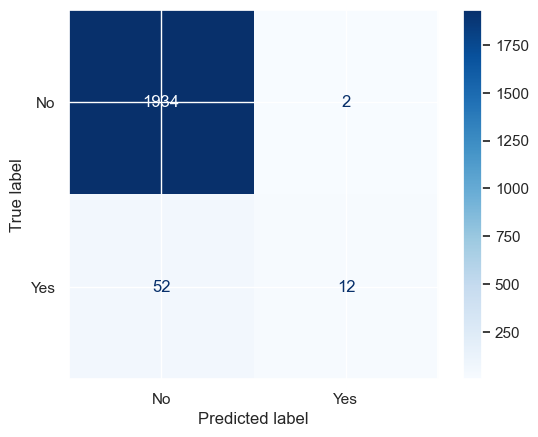

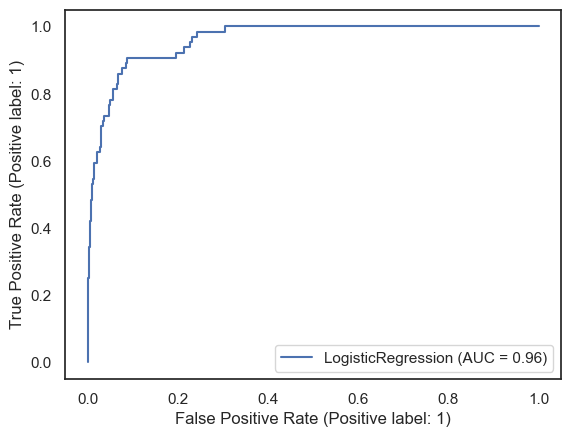

In [17]:
model1 = model_to_use('LR')
model1.fit(X_train,y_train)
performance(model1,X_train,y_train,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)


 Accuracy Score : 
  0.974

 AUC Score : 
 0.9006932786673554

 Confusion Matrix : 
  [[1928    8]
 [  44   20]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1936
           1       0.71      0.31      0.43        64

    accuracy                           0.97      2000
   macro avg       0.85      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


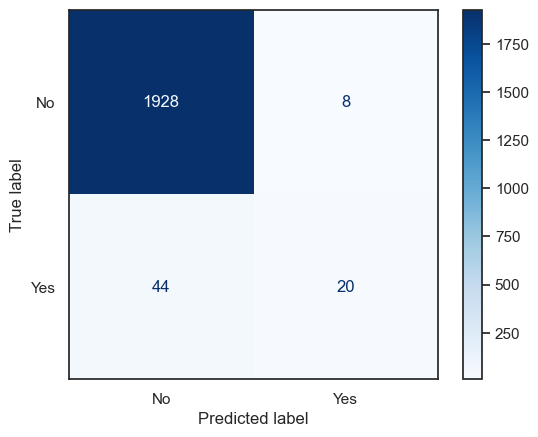

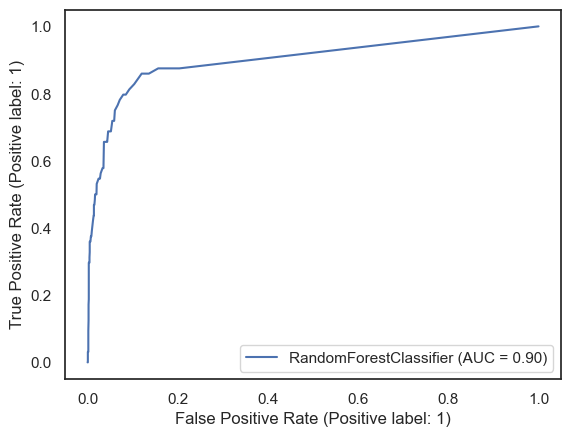

In [18]:
model1 = model_to_use('RF')
model1.fit(X_train,y_train)
performance(model1,X_train,y_train,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)


 Accuracy Score : 
  0.957

 AUC Score : 
 0.6454028925619835

 Confusion Matrix : 
  [[1894   42]
 [  44   20]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1936
           1       0.32      0.31      0.32        64

    accuracy                           0.96      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.96      0.96      0.96      2000


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


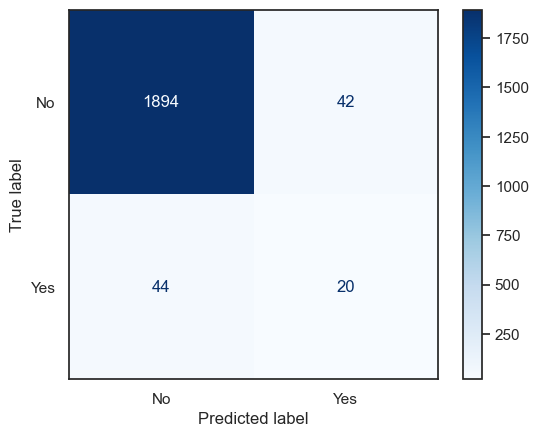

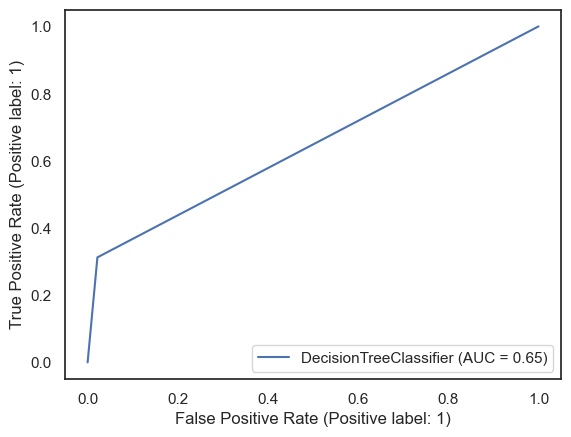

In [19]:
model3 = model_to_use('DT')
model3.fit(X_train,y_train)
performance(model3,X_train,y_train,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)

In [20]:
'''from imblearn.over_sampling import RandomOverSampler

# X is your feature matrix and y is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
import pandas as pd

# Convert NumPy arrays to Pandas DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Defaulted'])

'''

"from imblearn.over_sampling import RandomOverSampler\n\n# X is your feature matrix and y is your target vector\nros = RandomOverSampler(random_state=42)\nX_resampled, y_resampled = ros.fit_resample(X, y)\nimport pandas as pd\n\n# Convert NumPy arrays to Pandas DataFrames\nX_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)\ny_resampled_df = pd.DataFrame(y_resampled, columns=['Defaulted'])\n\n"


 Accuracy Score : 
  0.971

 AUC Score : 
 0.9395701510847108

 Confusion Matrix : 
  [[1921   15]
 [  43   21]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1936
           1       0.58      0.33      0.42        64

    accuracy                           0.97      2000
   macro avg       0.78      0.66      0.70      2000
weighted avg       0.97      0.97      0.97      2000


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


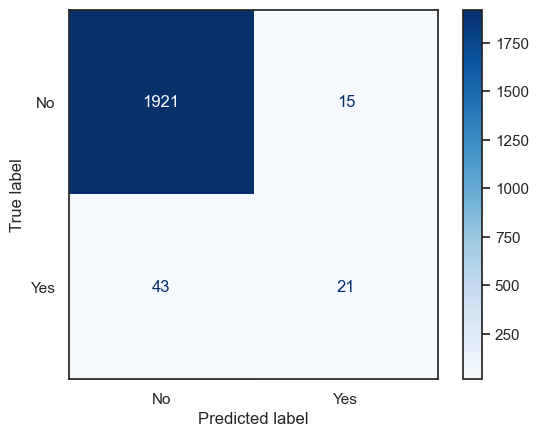

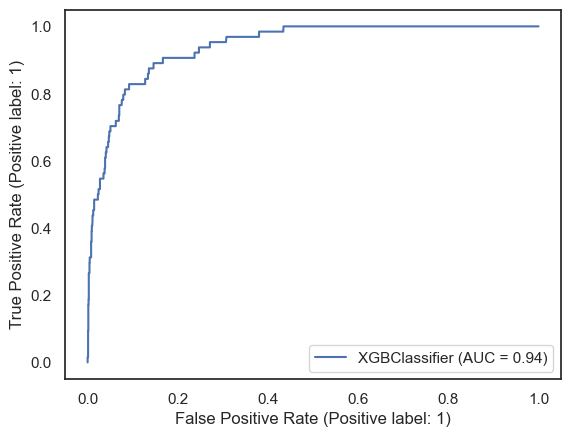

In [21]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)

# create the XGBoost model
model5 = xgb.XGBClassifier()

# fit the model on the training data
model5.fit(X_train, y_train)

performance(model5,X_train,y_train,X_test,y_test)

In [22]:

'''from sklearn.model_selection import GridSearchCV


# Define the XGBoost classifier
model6 = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model6, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)'''

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
#performance(model6,X_train,y_train,X_test,y_test)

NameError: name 'grid_search' is not defined

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)


model6 = xgb.XGBClassifier(objective='binary:logistic', random_state=42, 
                            learning_rate=0.01, max_depth=3, n_estimators=500)




# fit the model on the training data
model6.fit(X_train, y_train)

performance(model6,X_train,y_train,X_test,y_test)

In [ ]:
import pickle
from pickle import dump
#save the model
dump(model6, open('loan_model.pkl','wb'))



#save scaler
dump(scaler, open ('scal.pkl', "wb"))

In [ ]:
X_train.columns

In [ ]:
'''%%writefile loan.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np

model = pickle.load(open('loan_model.pkl','rb'))
scaler = pickle.load(open('scal.pkl','rb'))

def data1():
    Employed = st.selectbox('Employed',[0,1])
    Bank_Balance = st.number_input(' Bank Balance')
    Annual_Income = st.number_input('Annual Income')
    Monthly_Income = st.number_input('Monthly Income')

    feat = np.array([Employed, BankBalance, Annual Income, Monthly Income]).reshape(1,-1)
    cols = ['Employed', 'Bank Balance', 'Annual Income', 'Monthly Income']
    
    feat1 = pd.DataFrame(feat, columns=cols)
    
    return feat1
    
frame = data1()
if st.button('Show Input Data'):
    st.write(frame.head())

def prepare(df):
    #df = pd.get_dummies(data=df , columns=['Type'],drop_first=True)
    #df['Type'] = df['Type'].map({'L':0, 'M':1,'H':2})
    cols = df.columns
    df = scaler.transform(df)
    df = pd.DataFrame(df, columns=cols)
    return df
    
frame2= prepare(frame)

if st.button('Show process Data'):
    st.write(frame2.head())
    
if st.button('predict'):
    #frame2= prepare(frame)
    pred = model.predict(frame2)
    #if pred[0] == 0:
        #st.write('No Failure')
   # else:
    st.write(pred[0])
    #st.write(pred[0])
    '''